In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Gaussian reconstruction error as a function of sampling rate and phase shift

In [45]:
# original Gaussian
sigma = 1
t_c = np.linspace(-10, 10, 1000)
t_shifts = np.linspace(-2.5, 2.5, 31)[:, np.newaxis]
gaussian_array = np.exp(-(t_c - t_shifts)**2/(2*sigma))/sigma


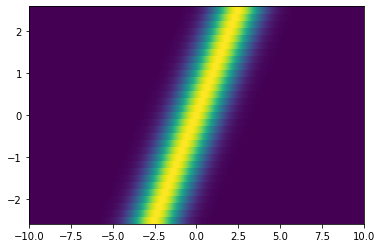

In [46]:
plt.pcolor(t_c, t_shifts, gaussian_array, shading='auto');

In [47]:
# downsample Gaussians using 2 methods
num_samped_points = 10
samp_time = 1000 // num_samped_points
t_disc1 = t_c[::samp_time]
t_disc2 = np.linspace(-10, 10, num_samped_points)
gaussian_array_disc1 = gaussian_array[:, ::samp_time]
gaussian_array_disc2 = np.exp(-(t_disc2- t_shifts)**2/(2*sigma))/sigma

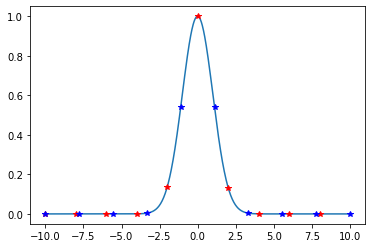

In [50]:
# compare
plt.plot(t_c, gaussian_array[15])
plt.plot(t_disc1, gaussian_array_disc1[15], 'r*')
plt.plot(t_disc2, gaussian_array_disc2[15], 'b*')

In [59]:
gaussian_array_reconst1 = np.repeat(gaussian_array_disc1, samp_time, axis=1)

In [64]:
# reconstruct
gaussian_array_reconst1 = np.repeat(gaussian_array_disc1, samp_time, axis=1)
gaussian_array_reconst2 = np.repeat(gaussian_array_disc2, samp_time, axis=1)

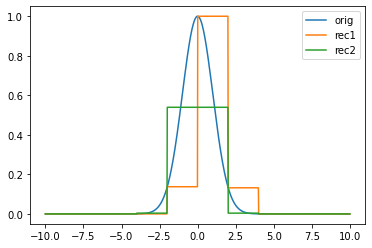

In [65]:
# compare - reconstructions are identical
pos = 15
plt.plot(t_c, gaussian_array[pos], label='orig')
plt.plot(t_c, gaussian_array_reconst1[pos], label='rec1')
plt.plot(t_c, gaussian_array_reconst2[pos], label='rec2')
plt.legend()

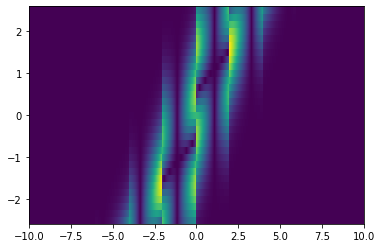

In [62]:
# look at reconstruction error
plt.pcolor(t_c, t_shifts, np.abs(gaussian_array - gaussian_array_reconst2), shading='auto');

Looks like the reconstruction error does not depend almost at all on the timeshift:

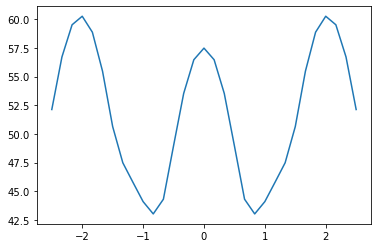

In [63]:
plt.plot(t_shifts, np.sum(np.abs(gaussian_array - gaussian_array_reconst2), axis=1));

In [31]:
# put everything in a function

def reconstuct_error_gaussian(sigma):
    num_samped_points = 50
    samp_time = 1000 // num_samped_points
    t_c = np.linspace(-10, 10, 1000)
    t_shifts = np.linspace(-0.5, 0.5, 11)[:, np.newaxis]
    gaussian_array = np.exp(-(t_c - t_shifts)**2/(2*sigma))/sigma
    t_disc2 = np.linspace(-10, 10, num_samped_points)
    gaussian_array_disc2 = np.exp(-(t_disc2 - t_shifts)**2/(2*sigma))/sigma
    gaussian_array_reconst2 = np.repeat(gaussian_array_disc2, samp_time, axis=1)
    reconstruct_error = np.squeeze(np.sum(np.abs(gaussian_array - gaussian_array_reconst2)[:]))
    return reconstruct_error

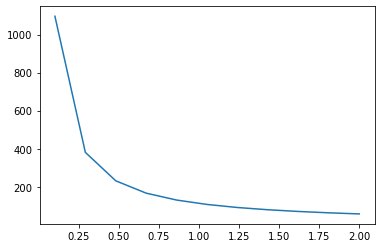

In [32]:
sigma_vec = np.linspace(0.1, 2, 11)
err_vec = [reconstuct_error_gaussian(sigma) for sigma in sigma_vec]
plt.plot(sigma_vec, err_vec)
